In [0]:

import tensorflow as tf
from tensorflow import keras

In [2]:
from keras.models import Sequential,Model
from keras.layers import Dense, Activation,Input
import numpy as np
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [0]:
from keras.datasets import imdb

In [0]:
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


In [0]:
#train_data[0]

In [0]:
train_data[0]
#a sequence of word indices

list

In [0]:
train_labels[0]

1

In [0]:
len(train_data)

25000

In [0]:
max([max(i) for i in train_data])

9999

In [0]:
#since 10000 words are used so no index greater than 10000

In [0]:
word_index = imdb.get_word_index()


1646592/1641221 [==============================] - 0s 0us/step


In [0]:
#word_index is a dictionary holding the word as key and value as index

In [0]:
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])


In [0]:
#reverse_word_index 


In [0]:
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[1]])
# 0,1,2 are reserved for padding/unknown

In [0]:
decoded_review

"? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal ? the hair is big lots of boobs ? men wear those cut ? shirts that show off their ? sickening that men actually wore them and the music is just ? trash that plays over and over again in almost every scene there is trashy music boobs and ? taking away bodies and the gym still doesn't close for ? all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then"

In [0]:
#encoding sequence
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [0]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [0]:
#vectorizing labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
model = Sequential()
model.add(Dense(16,activation='relu',input_shape=(10000,)))

In [0]:
model.add(Dense(16,activation='relu'))

In [0]:
model.add(Dense(1,activation='sigmoid'))

In [0]:
from keras.optimizers import SGD
from keras import losses
from keras import metrics
model.compile(optimizer=keras.optimizers.SGD(lr=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
# Validation Set

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [0]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 110us/step - loss: 0.6929 - accuracy: 0.5112 - val_loss: 0.6921 - val_accuracy: 0.5151
Epoch 2/20
15000/15000 [==============================] - 1s 89us/step - loss: 0.6900 - accuracy: 0.5410 - val_loss: 0.6891 - val_accuracy: 0.5400
Epoch 3/20
15000/15000 [==============================] - 1s 89us/step - loss: 0.6855 - accuracy: 0.5738 - val_loss: 0.6837 - val_accuracy: 0.5785
Epoch 4/20
15000/15000 [==============================] - 1s 90us/step - loss: 0.6778 - accuracy: 0.6151 - val_loss: 0.6748 - val_accuracy: 0.6223
Epoch 5/20
15000/15000 [==============================] - 1s 89us/step - loss: 0.6668 - accuracy: 0.6560 - val_loss: 0.6628 - val_accuracy: 0.6737
Epoch 6/20
15000/15000 [==============================] - 1s 87us/step - loss: 0.6537 - accuracy: 0.7022 - val_loss: 0.6500 - val_accuracy: 0.7029
Epoch 7/20
15000/15000 [==============================] - 1s 88us/s

In [0]:
type(history)

keras.callbacks.callbacks.History

In [0]:
history_dict = history.history
#model.fit() returns a history object. This object has a member history, which is a dictionary containing data about everything that happened during training

In [0]:
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [0]:
acc = history_dict['accuracy']


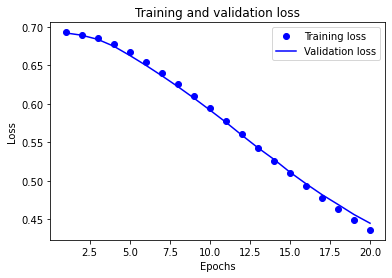

In [0]:
#Plotting the training and validation loss
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

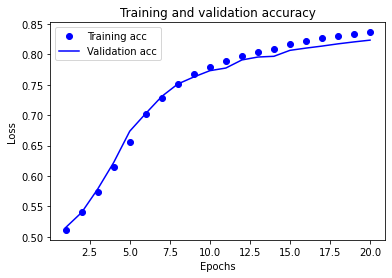

In [0]:
#Plotting the training and validation accuracy

plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [0]:
model.predict(x_test)

array([[0.47576073],
       [0.8562006 ],
       [0.7241818 ],
       ...,
       [0.2340799 ],
       [0.34685427],
       [0.47435114]], dtype=float32)

In [0]:
results = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 1s 60us/step


In [0]:
results

[0.4462882539367676, 0.8234000205993652]

In [0]:
from keras.datasets import reuters

In [4]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


In [5]:
print(len(train_data))
print(len(test_data))

8982
2246


In [6]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [7]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
    train_data[0]])


557056/550378 [==============================] - 0s 0us/step


In [8]:
train_labels[10]

3

In [9]:
max(train_labels)

45

In [10]:
min(train_labels)

0

In [0]:
#train_labels are between 0-45--46 labels


In [0]:
#encoding data 
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)



#def to_one_hot(labels, dimension=46):
 #   results = np.zeros((len(labels), dimension))
  #  for i, label in enumerate(labels):
   #     results[i, label] = 1.
    #return results

In [0]:
#Second Method keras import to_categorical
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [0]:
model = Sequential()
model.add(Dense(64,activation='relu',input_shape=(10000,)))
model.add(Dense(64,activation='relu'))
model.add(Dense(46,activation='softmax'))

In [0]:
from keras.optimizers import SGD

In [0]:
model.compile(optimizer=keras.optimizers.SGD(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [47]:
x_train[0].shape

(10000,)

In [48]:
len(x_train)

8982

In [0]:
#validating 
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [50]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 108us/step - loss: 1.8723 - accuracy: 0.5306 - val_loss: 1.8569 - val_accuracy: 0.5300
Epoch 2/20
7982/7982 [==============================] - 1s 101us/step - loss: 1.8700 - accuracy: 0.5309 - val_loss: 1.8547 - val_accuracy: 0.5300
Epoch 3/20
7982/7982 [==============================] - 1s 99us/step - loss: 1.8677 - accuracy: 0.5319 - val_loss: 1.8525 - val_accuracy: 0.5300
Epoch 4/20
7982/7982 [==============================] - 1s 102us/step - loss: 1.8654 - accuracy: 0.5321 - val_loss: 1.8503 - val_accuracy: 0.5310
Epoch 5/20
7982/7982 [==============================] - 1s 101us/step - loss: 1.8631 - accuracy: 0.5327 - val_loss: 1.8482 - val_accuracy: 0.5320
Epoch 6/20
7982/7982 [==============================] - 1s 102us/step - loss: 1.8608 - accuracy: 0.5332 - val_loss: 1.8461 - val_accuracy: 0.5320
Epoch 7/20
7982/7982 [==============================] - 1s 102us/step - loss:

In [0]:
history = history.history

In [52]:
history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [0]:
import matplotlib.pyplot as plt
loss = history['loss']
val_loss = history['val_loss']
epochs = range(1,len(loss)+1)


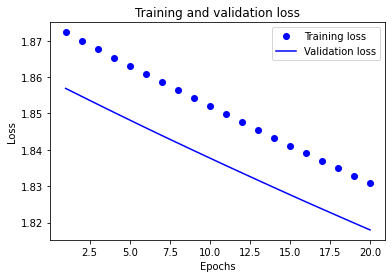

In [54]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

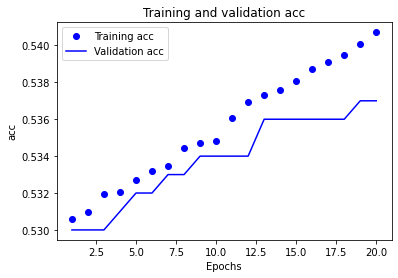

In [55]:
plt.clf()
val_acc = history['val_accuracy']
acc = history['accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()

plt.show()

In [56]:
results = model.evaluate(x_test, one_hot_test_labels)

2246/2246 [==============================] - 0s 97us/step


In [57]:
results

[1.8566597493121588, 0.5378450751304626]

In [0]:

predictions = model.predict(x_test)

In [60]:
predictions[0].shape

(46,)

In [61]:
np.sum(predictions[0])

1.0000001

In [62]:
np.argmax(predictions[0])

3

In [0]:
from keras.datasets import boston_housing

In [64]:
(train_data, train_targets), (test_data, test_targets) =boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [66]:
train_data.shape

(404, 13)

In [67]:
test_data.shape

(102, 13)

In [0]:
#train_targets

In [0]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [0]:
from keras.optimizers import RMSprop
def build_model():
    model = Sequential()
    model.add(Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [0]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

In [82]:
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [83]:
all_scores

[2.1731767654418945, 2.8160037994384766, 2.8979098796844482, 2.451388120651245]

In [0]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold # 0


In [0]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [0]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [0]:

model = build_model()
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

In [0]:
 test_mae_score